*********************** Logical States ***********************
OrderedDict([('A_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043]),
               'support': [Object(name=F_box, pos=[0.6        0.         0.95829998])]}),
             ('B_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043]),
               'support': [Object(name=E_box, pos=[ 0.6        -0.2         0.95829998])]}),
             ('C_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043]),
               'support': [Object(name=D_box, pos=[0.6        0.2        0.95829998])]}),
             ('D_box',
              {'on': Object(name=C_box, pos=[0.6        0.2        0.85829998])}),
             ('E_box',
              {'on': Object(name=B_box, pos=[ 0.6        -0.2         0.85829998])}),
             ('F_box',
              {'on': Object(name=A_box, pos=[0.6        0.         0.85829998])}),
             ('tray_red', {'static': True}),
             ('table',

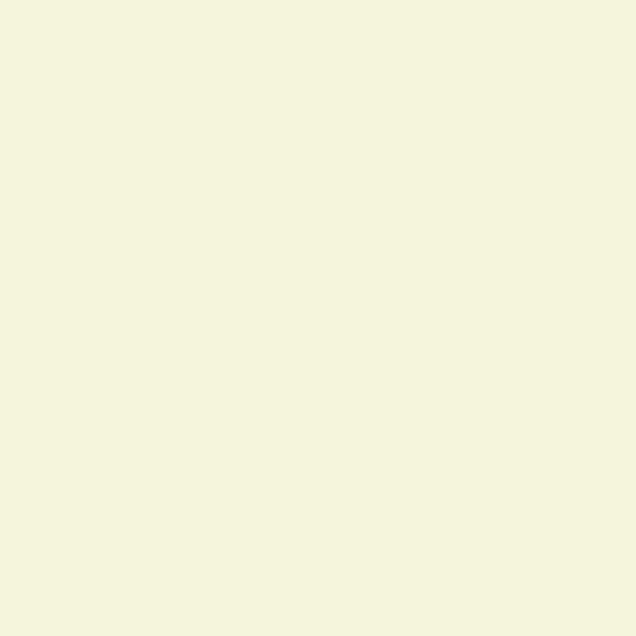

In [12]:
from pytamp.benchmark import Benchmark1
from pykin.utils import plot_utils as p_utils

benchmark1 = Benchmark1(robot_name="doosan", geom="visual", is_pyplot=False, box_num=6)
fig, ax = p_utils.init_3d_figure(name="Benchmark 1")

benchmark1.scene_mngr.is_pyplot = False
benchmark1.scene_mngr.render_scene(ax)
# benchmark1.scene_mngr.show()

In [3]:
benchmark1.scene_mngr.scene.objs['A_box'].gparam.bounds

array([[-0.05, -0.05, -0.05],
       [ 0.05,  0.05,  0.05]])

In [14]:
import easydict
def custom_parser():
    # object는 parser.add_argument( ~ , nargs="+") , nargs="+" 때문에 list로 arg 셋팅함
    args = easydict.EasyDict({
        "objects" : ["/home/juju/acronym/copied_data/grasps/Book_4698973d47c780654f48c7d5931203ac_0.01010965467789813.h5", "/home/juju/acronym/copied_data/grasps/Bag_b914f95b191ad7c27f91c3974257b780_0.012715081291695372.h5", "/home/juju/acronym/copied_data/grasps/Bowl_2efc35a3625fa50961a9876fa6384765_0.012449533111417973.h5"],
        "support" : "/home/juju/acronym/copied_data/grasps/3Shelves_29b66fc9db2f1558e0e89fd83955713c_0.0025867867973150068.h5",
        "num_grasps" : 5,
        "mesh_root" : '/home/juju/acronym/copied_data/',
        "support_scale" : 0.025
    })
    return args

args = custom_parser()

In [15]:
# for pytamp
# def get_object_mesh(mesh_name, scale=[1.0, 1.0, 1.0]):
#     file_path = pykin_path + "/assets/objects/meshes/"
#     mesh: trimesh.Trimesh = trimesh.load(file_path + mesh_name)
#     mesh.apply_scale(scale)
#     return mesh

from pykin.utils.mesh_utils import get_object_mesh, get_object_mesh_acronym
import h5py
import trimesh
import os
# for acronym
# def get_object_mesh_acronym(filename, mesh_root_dir, scale=[1.0, 1.0, 1.0]):
#     if filename.endswith(".h5"):
#         data = h5py.File(filename, "r")
#         mesh_fname = data["object/file"][()].decode('utf-8')
#         mesh_scale = data["object/scale"][()] if scale is None else scale
#     else:
#         raise RuntimeError("Unknown file ending:", filename)

#     mesh = trimesh.load(os.path.join(mesh_root_dir, mesh_fname))
#     mesh.apply_scale(mesh_scale)
#     return mesh


In [16]:
box_mesh = get_object_mesh("ben_cube.stl", 0.1)

object_meshes = [get_object_mesh_acronym(o, mesh_root_dir=args.mesh_root) for o in args.objects]



In [17]:
box_mesh

<trimesh.Trimesh(vertices.shape=(8, 3), faces.shape=(12, 3))>

In [18]:
object_meshes

[<trimesh.Trimesh(vertices.shape=(337, 3), faces.shape=(670, 3))>,
 <trimesh.Trimesh(vertices.shape=(1935, 3), faces.shape=(3874, 3))>,
 <trimesh.Trimesh(vertices.shape=(747, 3), faces.shape=(1490, 3))>]

In [19]:
box_mesh.bounds

array([[-0.05, -0.05, -0.05],
       [ 0.05,  0.05,  0.05]])

In [20]:
benchmark1.scene_mngr.show_logical_states()

*********************** Logical States ***********************
OrderedDict([('A_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043]),
               'support': [Object(name=F_box, pos=[0.6        0.         0.95829998])]}),
             ('B_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043]),
               'support': [Object(name=E_box, pos=[ 0.6        -0.2         0.95829998])]}),
             ('C_box',
              {'on': Object(name=table, pos=[ 1.    -0.6    0.043]),
               'support': [Object(name=D_box, pos=[0.6        0.2        0.95829998])]}),
             ('D_box',
              {'on': Object(name=C_box, pos=[0.6        0.2        0.85829998])}),
             ('E_box',
              {'on': Object(name=B_box, pos=[ 0.6        -0.2         0.85829998])}),
             ('F_box',
              {'on': Object(name=A_box, pos=[0.6        0.         0.85829998])}),
             ('tray_red', {'static': True}),
             ('table',

In [21]:
benchmark1.scene_mngr.scene.objs['table'].h_mat

array([[ 1.   ,  0.   ,  0.   ,  1.   ],
       [ 0.   ,  1.   ,  0.   , -0.6  ],
       [ 0.   ,  0.   ,  1.   ,  0.043],
       [ 0.   ,  0.   ,  0.   ,  1.   ]])

In [22]:
import copy
import numpy as np
custum_h_mat = copy.deepcopy(benchmark1.scene_mngr.scene.objs['table'].h_mat)

In [23]:
A_box_h = copy.deepcopy(benchmark1.scene_mngr.scene.objs['A_box'].h_mat)

In [24]:
B_box_h = np.array([[ 8.83678644e-01,  4.68094014e-01,  2.18005747e-04,
         -8.39914618e-01],
        [-4.68092995e-01,  8.83677524e-01, -1.72656170e-03,
          1.36830811e-01],
        [-1.00083998e-03,  1.42367874e-03,  9.99998486e-01,
          7.67042939e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]])

In [25]:
custum_h_mat

array([[ 1.   ,  0.   ,  0.   ,  1.   ],
       [ 0.   ,  1.   ,  0.   , -0.6  ],
       [ 0.   ,  0.   ,  1.   ,  0.043],
       [ 0.   ,  0.   ,  0.   ,  1.   ]])

In [15]:
custum_h_mat@B_box_h

array([[ 8.83678644e-01,  4.68094014e-01,  2.18005747e-04,
         1.60085382e-01],
       [-4.68092995e-01,  8.83677524e-01, -1.72656170e-03,
        -4.63169189e-01],
       [-1.00083998e-03,  1.42367874e-03,  9.99998486e-01,
         8.10042939e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])

In [26]:
B_box_h, custum_h_mat

(array([[ 8.83678644e-01,  4.68094014e-01,  2.18005747e-04,
         -8.39914618e-01],
        [-4.68092995e-01,  8.83677524e-01, -1.72656170e-03,
          1.36830811e-01],
        [-1.00083998e-03,  1.42367874e-03,  9.99998486e-01,
          7.67042939e-01],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 array([[ 1.   ,  0.   ,  0.   ,  1.   ],
        [ 0.   ,  1.   ,  0.   , -0.6  ],
        [ 0.   ,  0.   ,  1.   ,  0.043],
        [ 0.   ,  0.   ,  0.   ,  1.   ]]))